In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
col_list = ["NEWEdImpt","JobSat","ConvertedComp"]
data = pd.read_csv("C:/Users/noshi/Desktop/poralekha/Sem8/SoftwareMetrics/survey_results_public.csv",usecols=col_list)
#data = data.replace('NA', np.nan)
data.dropna(inplace=True)
#data.head
#list(data.columns.values)
print(data.shape)
#print(data)

(34212, 3)


In [21]:
data['NEWEdImpt'].value_counts()
#data['Hobbyist'] = data[np.isfinite(data['Hobbyist'])]
data['NEWEdImpt'] = data['NEWEdImpt'].map({'Not at all important/not necessary': 1, 'Somewhat important': 2,
                                          'Fairly important': 3, 'Very important': 4,
                                    'Critically important': 5})
data['JobSat'].value_counts()
data['JobSat'] = data['JobSat'].map({'Very dissatisfied': 1, 'Slightly dissatisfied': 2,
                                    'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied': 4,
                                    'Very satisfied': 5})
#data['ConvertedComp'].value_counts()

In [22]:
data['ConvertedComp']=(data['ConvertedComp']-data['ConvertedComp'].min())/(data['ConvertedComp'].max()-data['ConvertedComp'].min())
#data['ConvertedComp'].value_counts()

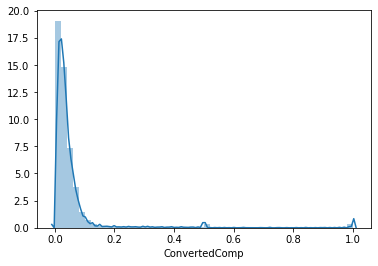

In [23]:
#plt.hist(data['ConvertedComp'])
#plt.show() 
sns.distplot(data['ConvertedComp'])

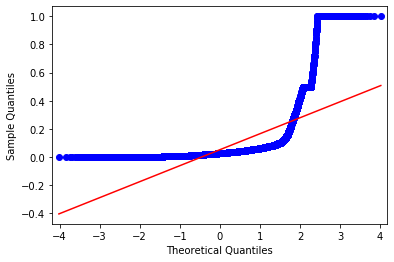

In [24]:
# q-q plot
qqplot(data['ConvertedComp'], line='s')
plt.show()

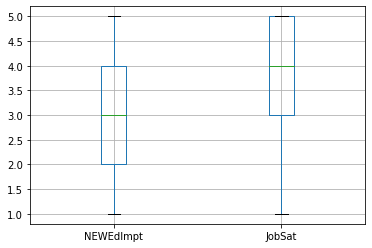

In [25]:
#checking equal variance with boxplot
boxplot = data.boxplot(column=['NEWEdImpt', 'JobSat'])

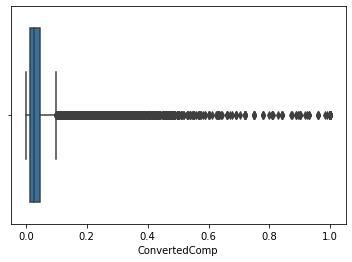

In [26]:
sns.boxplot(x=data['ConvertedComp'])

In [27]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

In [28]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(31943, 3)

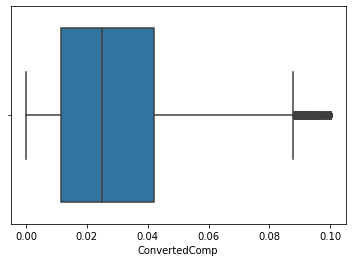

In [29]:
sns.boxplot(x=data_out['ConvertedComp'])

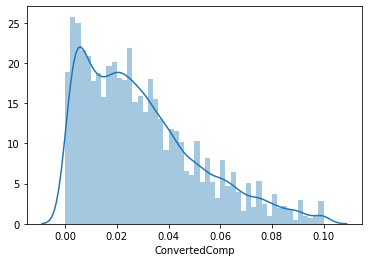

In [30]:
#plt.hist(data_out['ConvertedComp'])
#plt.show() 
sns.distplot(data_out['ConvertedComp'])

G:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


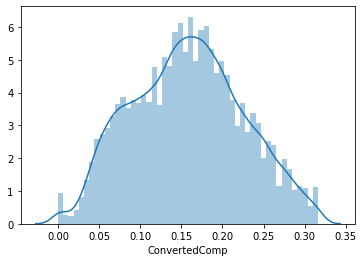

In [31]:
#sqrdata=data_out['ConvertedComp']**(.5)
data_out['ConvertedComp']=data_out['ConvertedComp']**(.5)
sns.distplot(data_out['ConvertedComp'])

In [32]:
#perform two-way ANOVA
model = ols('ConvertedComp ~ C(NEWEdImpt) + C(JobSat) + C(NEWEdImpt):C(JobSat)', data=data_out).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(NEWEdImpt),0.520120,4.0,29.537843,1.473144e-24
C(JobSat),4.730305,4.0,268.635944,1.675462e-227
C(NEWEdImpt):C(JobSat),0.084626,16.0,1.201485,2.573100e-01
Residual,140.507885,31918.0,NaN,NaN


In [20]:
#Since the p-values for NEWEdImpt and JobSat are both less than .05, 
#this means that both factors have a statistically significant effect on ConvertedComp.

#And since the p-value for the interaction effect is less than .05, 
#this tells us that there is significant interaction effect between NEWEdImpt and JobSat.